# Prerequsite test ES 335 Machine Learning (August 2024)
Devansh Lodha
23110091

## Problem 1
**How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

We have two matrices: 
$$
A_{n,k} = 
\begin{bmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,k} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,k} \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_{n,1} & a_{n,2} & \cdots & a_{n,k} 
\end{bmatrix},
B_{k,m} = 
\begin{bmatrix}
b_{1,1} & b_{1,2} & \cdots & b_{1,m} \\
b_{2,1} & b_{2,2} & \cdots & b_{2,m} \\
\vdots  & \vdots  & \ddots & \vdots  \\
b_{k,1} & b_{k,2} & \cdots & b_{k,m} 
\end{bmatrix}
$$
The resultant matrix upon matrix multiplication of $A$ and $B$ is:
$$
C_{n,m} = 
\begin{bmatrix}
c_{1,1} & c_{1,2} & \cdots & c_{1,m} \\
c_{2,1} & c_{2,2} & \cdots & c_{2,m} \\
\vdots  & \vdots  & \ddots & \vdots  \\
c_{n,1} & c_{n,2} & \cdots & c_{n,m} 
\end{bmatrix}
$$
where each element $c_{i,j}$ is:
$$c_{i,j} = \sum_{l=1}^{k} a_{i,l}\cdot b_{l,j}$$
For every $c_{i,j}$ we need to perform $k$ multiplications and $k-1$ additions.
Thus we need to perform $knm$ multiplications and $(k-1)nm$ additions for matrix multiplication between $A$ and $B$.

## Problem 2
**Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [1]:
def matmul(A, B):
    """
    Performs matrix multiplication of two list of lists

    Args:
        A: List of lists representing first matrix
        B: List of lists representing second matrix
    
    Returns:
        List of lists representing product of the two matrices.
    """

    n, k, m = len(A), len(B), len(B[0])

    C = [[0]*m]*n

    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l]*B[l][j]
    
    return C

In [2]:
# setting up timing functions
from timeit import default_timer as timer
def print_time(start:float,
                     end: float,
                     method: str):
    total_time = end - start
    print(f"{method}: {total_time} seconds")

In [3]:
# Example matrices
A = [[1, 2, 3, 4, 5],
     [6, 7, 8, 9, 10],
     [11, 12, 13, 14, 15]]
B = [[1, 2, 3, 4],
     [5, 6, 7, 8],
     [9, 10, 11, 12],
     [13, 14, 15, 16],
     [17, 18, 19, 20]]

# performing matrix multplication without numpy
start_time_without_numpy = timer()
print(matmul(A, B))
end_time_without_numpy = timer()
print_time(start=start_time_without_numpy,
                  end = end_time_without_numpy,
                  method = "matrix multiplication without numpy")

[[1200, 1320, 1440, 1560], [1200, 1320, 1440, 1560], [1200, 1320, 1440, 1560]]
matrix multiplication without numpy: 4.600000102072954e-05 seconds


In [4]:
# performing matrix multplication with numpy
import numpy as np
A = np.array(A)
B = np.array(B)
start_time_with_numpy = timer()
print(np.matmul(A, B))
end_time_with_numpy = timer()
print_time(start=start_time_with_numpy,
                  end = end_time_with_numpy,
                  method = "matrix multiplication with numpy")

[[175 190 205 220]
 [400 440 480 520]
 [625 690 755 820]]
matrix multiplication with numpy: 0.0007142090471461415 seconds


Clearly using numpy is faster. This is because numpy's operations are optimized since numpy arrays are homogenous and have low level implementations.

## Problem 3
**Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against `numpy.median` routine in terms of time?**

Median for an array with $n$ elements where $n$ is odd is the $\frac{n}{2}^{th}$ largest element and when $n$ is even, its the mean of the $\frac{n}{2}^{th}$ and $(\frac{n}{2}-1)^{th}$ largest element.
Finding the highest element in an array requires one pass of the array. Finding the second highest element requires 2 passes of the array. By this approach finding the median implies an $\mathcal{O}(n^2)$ time complexity. 

We can code this out in Python as follows:

In [5]:
def median_n_square(arr):
  n = len(arr)
  for i in range(n - 1, n//2 - 2, -1):
      max_idx = i
      for j in range(i):
          if arr[j] > arr[max_idx]:
              max_idx = j

      arr[max_idx], arr[i] = arr[i], arr[max_idx]

  if n % 2 == 1:
    print(arr[n//2])
  else:
    print((arr[n//2] + arr[n//2 - 1])/2)

A better method would be to directly sort the array in $\mathcal{O}(n\log(n))$ time.

In [6]:
def median_n_log_n(arr):
  n = len(arr)
  arr = sorted(arr)
  if (n % 2 == 1):
    print(arr[n//2])
  else:
    print((arr[n//2] + arr[n//2 - 1])/2)

In [7]:
A = [6, 7, 8, 1, 5, 9, 13, 14, 10, 2, 3, 4, 11, 12, 15]
print(A)
print(sorted(A))

[6, 7, 8, 1, 5, 9, 13, 14, 10, 2, 3, 4, 11, 12, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


comparing time

In [8]:
start_time_n_square_without_numpy = timer()
median_n_square(A)
end_time_n_square_without_numpy = timer()
print_time(start=start_time_n_square_without_numpy,
           end = end_time_n_square_without_numpy,
           method="Median using O(n^2) algorithm")

8
Median using O(n^2) algorithm: 7.399998139590025e-05 seconds


In [9]:
start_time_n_log_n_without_numpy = timer()
median_n_log_n(A)
end_time_n_log_n_without_numpy = timer()
print_time(start=start_time_n_log_n_without_numpy,
           end = end_time_n_log_n_without_numpy,
           method="Median using O(nlog(n)) algorithm")

8
Median using O(nlog(n)) algorithm: 7.26659782230854e-05 seconds


In [10]:
start_time_with_numpy = timer()
print(np.median(A))
end_time_with_numpy = timer()
print_time(start=start_time_with_numpy,
           end = end_time_with_numpy,
           method="Median using numpy")

8.0
Median using numpy: 0.00026241689920425415 seconds


## Problem 4
**What is the gradient of the following function with respect to x and y?**
$$x^2y+y^3sin(x)$$

Let $f(x,y) = x^2y+y^3sin(x)$
$$\nabla f = 
\begin{bmatrix}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y} 
\end{bmatrix}
=\begin{bmatrix}
2xy+y^3cos(x) \\
x^2 + 3y^2sin(x)
\end{bmatrix}$$

## Problem 5
**Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.**

In [11]:
import jax
import jax.numpy as jnp
from jax import jit
import random

def my_gradient(x, y):
    return 2*x*y + y**3*jnp.cos(x), x**2 + 3*y**2*jnp.sin(x)

def f(x,y):
    return x**2*y + y**3*jnp.sin(x)

In [12]:
pairs = []
for _ in range(10):
    x = random.random()
    y = random.random()
    pairs.append((x, y))

In [13]:
my_gradient = jit(my_gradient)
j_gradient = jit(jax.grad(f, argnums=(0,1)))

In [14]:
for x,y in pairs:
    ans = my_gradient(x,y)
    if my_gradient(x,y) == j_gradient(x,y):
        print(ans, ": match!")

Platform 'METAL' is experimental and not all JAX functionality may be correctly supported!


Metal device set to: Apple M3 Max

systemMemory: 36.00 GB
maxCacheSize: 13.50 GB

(Array(1.2038269, dtype=float32, weak_type=True), Array(1.0225277, dtype=float32, weak_type=True)) : match!
(Array(0.5261933, dtype=float32, weak_type=True), Array(0.15872765, dtype=float32, weak_type=True)) : match!
(Array(0.5471258, dtype=float32, weak_type=True), Array(0.74722475, dtype=float32, weak_type=True)) : match!
(Array(0.9689295, dtype=float32, weak_type=True), Array(1.4997482, dtype=float32, weak_type=True)) : match!
(Array(1.03113, dtype=float32, weak_type=True), Array(0.98250437, dtype=float32, weak_type=True)) : match!
(Array(2.4633555, dtype=float32, weak_type=True), Array(3.3462381, dtype=float32, weak_type=True)) : match!
(Array(0.5940649, dtype=float32, weak_type=True), Array(0.504322, dtype=float32, weak_type=True)) : match!
(Array(0.76360536, dtype=float32, weak_type=True), Array(1.3376769, dtype=float32, weak_type=True)) : match!
(Array(0.76864475, dtype=float32, weak_type=True), Ar

W0000 00:00:1722952738.917225 13220881 mps_client.cc:510] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!
I0000 00:00:1722952738.926825 13220881 service.cc:145] XLA service 0x137e12a90 initialized for platform METAL (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722952738.926838 13220881 service.cc:153]   StreamExecutor device (0): Metal, <undefined>
I0000 00:00:1722952738.929177 13220881 mps_client.cc:406] Using Simple allocator.
I0000 00:00:1722952738.929188 13220881 mps_client.cc:384] XLA backend will use up to 28989243392 bytes on device 0 for SimpleAllocator.


## Problem 6
**Use `sympy` to confirm that you obtain the same gradient analytically.**

In [15]:
import sympy as smp
smp.__version__

'1.13.1'

In [16]:
x = smp.symbols("x")
y = smp.symbols("y")
f = x**2 * y + y**3 * smp.sin(x)
dfdx, dfdy = smp.diff(f, x), smp.diff(f, y)
display(dfdx)
display(dfdy)

2*x*y + y**3*cos(x)

x**2 + 3*y**2*sin(x)

## Problem 7
**Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:**
1. 2022
    1. Branch 1
        1. Roll Number: 1, Name: N, Marks:
            1. Maths: 100, English: 70...
    2. Branch 2
2. 2023
    1. Branch 1
    2. Branch 2
2. 2024
    1. Branch 1
    2. Branch 2
2. 2025
    1. Branch 1
    2. Branch 2

In [17]:
nested_hierarchy = {
    2022: {
        "Branch 1": {
            1: {
                "Roll Number": 1,
                "Name": "N",
                "Marks": {
                    "Maths": 100,
                    "English": 70
                }
            }
        },
        "Branch 2": {

        }
    },
    2023: {
        "Branch 1": {

        },
        "Branch 2": {

        }
    },
    2024: {
        "Branch 1": {

        },
        "Branch 2": {
            
        }
    },
    2025: {
        "Branch 1": {

        },
        "Branch 2": {
            
        }
    }
}

## Problem 8
**Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

Lets first create a student class. A student can have properties like name and roll number which can be assigned during the creation of the student instance. Now, in a real life database, the students would recieve marks at some point after the creation of the student instance (ie: after them regstering for the branch). So we can create a method to add marks for a particular subject to a particular student instance.

In [18]:
class Student:
    def __init__(self, name, roll_number):
        self.name = name
        self.roll_number = roll_number
        self.marks = {}

    def add_marks(self, subject, marks):
        self.marks[subject] = marks

Now lets move on to creating a class for the branch. Each branch will have a number assigned during creation of a branch instance. We need functionality to add students to the branch for which we can create a method.

In [19]:
class Branch:
    def __init__(self, branch_number):
        self.branch_number = branch_number
        self.students = []
    def add_student(self, student):
        self.students.append(student)

Finally lets create a Year class. It will need a method to add branches to that year. We must also include a method to print the structure of our database.

In [20]:
class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)
    
    def data(self):
        print(f"Year: {self.year}")
        for branch in self.branches:
            print(f"\tBranch {branch.branch_number}")
            for student in branch.students:
                print(f"\t\tRoll Number: {student.roll_number}, Name: {student.name}")
                print(f"\t\t\tMarks")
                for subject in student.marks:
                    print(f"\t\t\t{subject}: {student.marks[subject]}")

In [21]:
# initialize year 2023
year_2023 = Year(2023)

# initialize branches 1 and 2 for year 2023
branch1_2023 = Branch(1)
branch2_2023 = Branch(2)
year_2023.add_branch(branch1_2023)
year_2023.add_branch(branch2_2023)

# register 2 students for year 2023
student1_2023 = Student("A", 1)
student2_2023 = Student("B", 2)

# add them to their respective branches
branch1_2023.add_student(student1_2023)
branch2_2023.add_student(student2_2023)

# add their marks for some subjects
student1_2023.add_marks("Linear Algebra", 88)
student1_2023.add_marks("Multivariable Calculus", 95)
student2_2023.add_marks("Probability and Statistics", 88)
student2_2023.add_marks("Machine Learning", 93)

year_2023.data()

Year: 2023
	Branch 1
		Roll Number: 1, Name: A
			Marks
			Linear Algebra: 88
			Multivariable Calculus: 95
	Branch 2
		Roll Number: 2, Name: B
			Marks
			Probability and Statistics: 88
			Machine Learning: 93


## Problem 9
**Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**
1. $y=x$
2. $y=x^2$
3. $y=\frac{x^3}{100}$
4. $y=\sin(x)$
5. $y=\frac{\sin(x)}{x}$
6. $y=\log(x)$
7. $y=e^x$

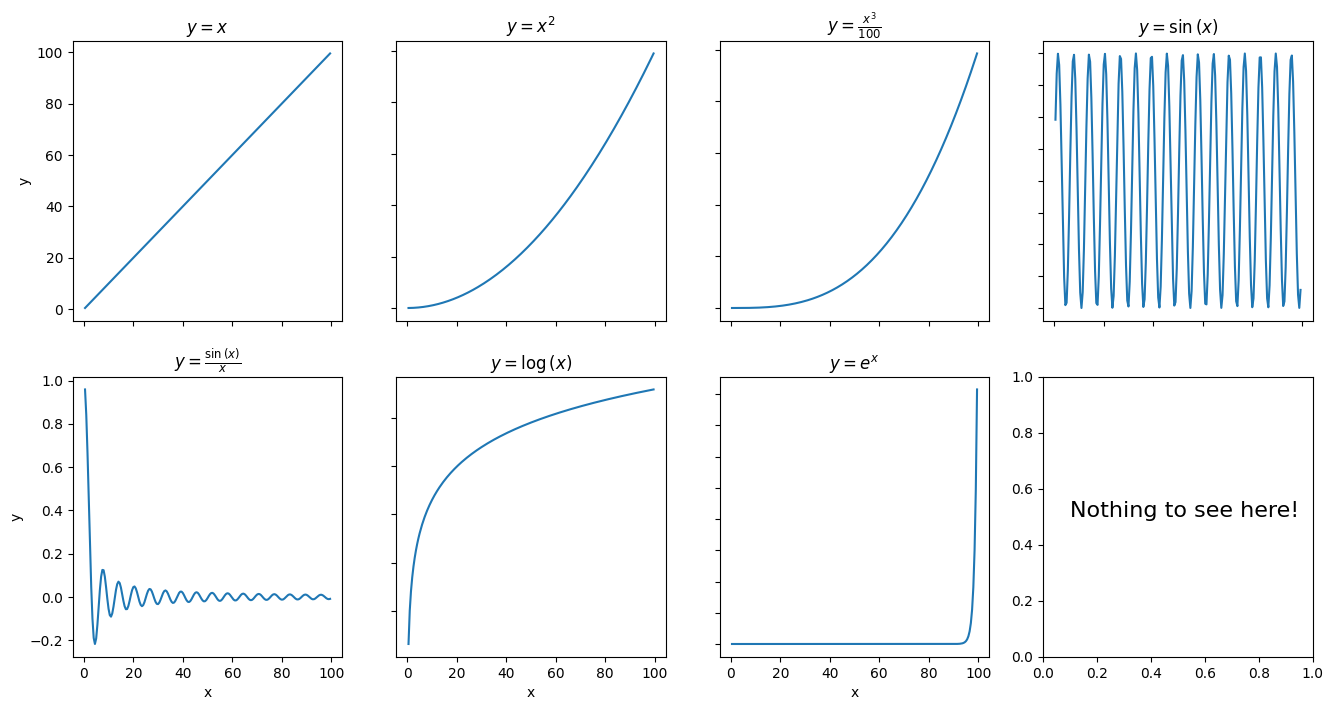

In [22]:
import matplotlib.pyplot as plt

x = np.arange(0.5, 100, 0.5)
functions = np.array([x, x**2, x**3/100, np.sin(x), np.sin(x)/x, np.log(x), np.exp(x)])
titles = np.array([r"$y = x$", r"$y = x^2$", r"$y = \frac{x^3}{100}$", r"$y = \sin{(x)}$", r"$y = \frac{\sin{(x)}}{x}$", r"$y = \log{(x)}$", r"$y = e^x$"])

fig, axs = plt.subplots(2, 4, figsize=(16,8))
curr = 0
for i in range(2):
    for j in range(4):
        if curr == 7:
            axs[i, j].text(0.1, 0.5, "Nothing to see here!", fontsize = 16)
            break
        axs[i, j].plot(x, functions[curr])
        axs[i, j].set_title(titles[curr])
        axs[i, j].set(xlabel = "x", ylabel = "y")
        axs[i, j].label_outer()
        curr+=1

## Problem 10
**Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [23]:
import pandas as pd

random_matrix = np.random.rand(20,5)+1
random_matrix

array([[1.64295609, 1.39463592, 1.04232224, 1.56213983, 1.63279073],
       [1.18657478, 1.04124403, 1.66880097, 1.64797252, 1.95250996],
       [1.05902766, 1.60803884, 1.03459332, 1.09121947, 1.92683232],
       [1.62959554, 1.81431402, 1.21364845, 1.02815031, 1.97222969],
       [1.03515621, 1.45200671, 1.83816539, 1.92863162, 1.92193294],
       [1.61319486, 1.37876078, 1.92203622, 1.18421607, 1.17082706],
       [1.03104123, 1.50725035, 1.86572488, 1.14199523, 1.52608286],
       [1.64599571, 1.27844219, 1.98136178, 1.85477753, 1.21496627],
       [1.57277136, 1.9940196 , 1.34203738, 1.8581575 , 1.18821587],
       [1.95499437, 1.25124765, 1.36734136, 1.84489258, 1.40734897],
       [1.69443573, 1.74618461, 1.54347748, 1.76931948, 1.46457077],
       [1.93582442, 1.28358602, 1.80707092, 1.59314293, 1.31700369],
       [1.33919795, 1.90771432, 1.33919317, 1.5468178 , 1.04630844],
       [1.03195563, 1.91151808, 1.96639209, 1.04668613, 1.73000928],
       [1.01352025, 1.94107274, 1.

In [24]:
column_names = ["a", "b", "c", "d", "e"]
df = pd.DataFrame(random_matrix, columns=column_names)
df

,a,b,c,d,e
0,1.642956,1.394636,1.042322,1.562140,1.632791
1,1.186575,1.041244,1.668801,1.647973,1.952510
2,1.059028,1.608039,1.034593,1.091219,1.926832
3,1.629596,1.814314,1.213648,1.028150,1.972230
4,1.035156,1.452007,1.838165,1.928632,1.921933
5,1.613195,1.378761,1.922036,1.184216,1.170827
6,1.031041,1.507250,1.865725,1.141995,1.526083
7,1.645996,1.278442,1.981362,1.854778,1.214966
8,1.572771,1.994020,1.342037,1.858157,1.188216
9,1.954994,1.251248,1.367341,1.844893,1.407349


In [25]:
print(f"Column with the highest standard deviation: {column_names[df.describe().loc["std"].argmax()]}")

Column with the highest standard deviation: c


In [26]:
print(f"Row with the lowest mean: {df.mean(axis=1).argmin()}")

Row with the lowest mean: 14


## Problem 11
**Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [27]:
df["f"] = df.sum(axis=1)
df["g"] = df["f"].apply(lambda x: "LT8" if x < 8 else "GT8")

In [28]:
print(f"Standard deviation of f where g is LT8: {df[df["g"]=="LT8"].describe()["f"].loc["std"]}")

Standard deviation of f where g is LT8: 0.4436295490197919


In [29]:
print(f"Standard deviation of f where g is GT8: {df[df["g"]=="GT8"].describe()["f"].loc["std"]}")

Standard deviation of f where g is GT8: 0.2804606354279612


## Problem 12
**Write a small piece of code to explain broadcasting in numpy.**

numpy broadcasting causes the operands to match each others shapes.

In [30]:
A = np.arange(5)
B = np.arange(5).reshape((5,1))
print(A.shape)
print(A)
print()
print(B.shape)
print(B)

(5,)
[0 1 2 3 4]

(5, 1)
[[0]
 [1]
 [2]
 [3]
 [4]]


In [31]:
C = A+B
print(C.shape)
print(C)

(5, 5)
[[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]
 [4 5 6 7 8]]


In the above example, the A array is broadcasted vertically and the array B is broadcasted horizontally to match the 2D shape of (5,5). \
Another example could be:

In [32]:
A = np.arange(5)
B = 1
print(A.shape)
print(A)

(5,)
[0 1 2 3 4]


In [33]:
C = A + B
print(C.shape)
print(C)

(5,)
[1 2 3 4 5]


In the above example, B=1 is broadcasted to a shape (5,) array to be added to A.

## Problem 13
**Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [34]:
def argmin(nparr, axis=None, out=None):
    # I would just like to point out that I've tried to follow Google's Python style guide and decided to include docstrings, this code is NOT GPT generated. Also I've tried to reach as close as possible to numpy's argmin
    """
    Returns the indices of the minimum values along an axis.

    Args:
        a: input array.
        axis: Axis along which to operate. If None, the flattened array is used.
        out: Array into which the result is placed. Must have the same shape as the expected output.

    Returns:
        index_array: Array of indices of the minimum values if `axis` is specified and `out` is None.
                   Integer index of the minimum value if `axis` is None and `out` is None.
                   None if `out` is specified.

    Raises:
        ValueError: If `axis` is out of bounds or if `out` has the wrong shape.
    """
    nparr_shape = nparr.shape
    if axis is None:
        if out is not None and out != np.array(0):
             raise ValueError("out has the wrong shape")
        else:
            nparr = np.ndarray.flatten(nparr)
            min_idx = 0
            min_val = nparr[0]
            for i in range(len(nparr)):
                if nparr[i] < min_val:
                    min_idx = i 
                    min_val = nparr[i]
            if out is not None:
                out = min_idx
            else:
                return min_idx

    elif axis == 0:
        if nparr_shape[1] != out.shape[0]:
            raise ValueError("out has the wrong shape")
        else:
            for col in range(nparr_shape[1]):
                min_idx = 0
                min_val = nparr[0, col]
                for row in range(nparr_shape[0]):
                    if nparr[row, col] < min_val:
                        min_idx = row
                        min_val = nparr[row, col]
                out[col] = min_idx
    elif axis == 1:
        if nparr_shape[0] != out.shape[0]:
            raise ValueError("out has the wrong shape")
        else:
            for row in range(nparr_shape[0]):
                min_idx = 0
                min_val = nparr[row, 0]
                for col in range(nparr_shape[0]):
                    if nparr[row, col] < min_val:
                        min_idx = row
                        min_val = nparr[row, col]
                out[row] = min_idx
    else:
        raise ValueError("axis is out of bounds")

In [35]:
# using numpy argmin

array1 = np.array([[10, 17, 25, 24], 
    [15, 11, 22, 30], 
    [11, 19, 20, 69]])

# create an empty array
array2= np.array([0, 0, 0, 0])

# pass the 'out' argument to store the result in array2
np.argmin(array1, axis = 0, out = array2)

print(array2)
print(np.argmin(array1))

[0 1 2 0]
0


In [36]:
# using our argmin

array1 = np.array([[10, 17, 25, 24], 
    [15, 11, 22, 30], 
    [11, 19, 20, 69]])

# create an empty array
array2= np.array([0, 0, 0, 0])

# pass the 'out' argument to store the result in array2
argmin(array1, axis = 0, out = array2)

print(array2)
print(argmin(array1))

[0 1 2 0]
0


We get same results!